# Testing iMinuit for make benefit glorious nation of Kazakhstan


## 1. Basic stuff
This is a small test setup for fitting with iMinuit. What do I do?
1. Import stuff (and things).
2. Define a Gaussian function for fitting.
3. Define a general $\chi^2$-function which takes as input any 1D (x,y) data and function you can dream of.
4. Make random fake data. In this case a Gaussian distribution.
5. Put everything into the specific $\chi^2$ function which is minimized. Leave parameters to optimize as function inputs.
6. Minimize with iMinuit.
7. Profit.

In [340]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

%pylab inline
from iminuit import Minuit, describe, Struct

plt.rcParams['figure.figsize'] = (12.0, 9.0)
plt.set_cmap('viridis')

from pathlib import Path
import os
os.environ['MPLCONFIGDIR'] = '/project/lgrandi/xenon1t/mplconfigs/'
if not Path(matplotlib.get_configdir()+'/stylelib').exists(): 
    os.mkdir(matplotlib.get_configdir()+'/stylelib') 
    with open(matplotlib.get_configdir()+'/stylelib/SR0.mplstyle', 'w') as f: 
        f.write(style) 
        # use the style 
plt.style.use(matplotlib.get_configdir()+'/stylelib/SR0.mplstyle')
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.linestyle'] = '-'

Populating the interactive namespace from numpy and matplotlib


In [364]:
from IPython.display import HTML

def Init_HTML_additions(maxlevel=3, attribution=''):
    """
    Adds a floating code hider button and table of content to the top right of the notebook. Only the first apperance of equal headlines is linked. This can also be used to add a table of content somewhere in a markdown cell.

    To add a table of content in a markdown cell use the following code:
        <h2 id="tocheading">Table of Content</h2>
        <div id="tocinline"></div>
    
    Args:
        maxlevel: Set the max level to which headlines are added. (default: maxlevel=3)
        attribution: This will add a footer with you desired string. (default: attribution='')
    """
    if attribution == 'LA': attribution = 'Created by Lutz Althüser for the XENON collaboration.'
    return HTML('''<script>
// Converts integer to roman numeral
function romanize(num) {
    var lookup = {M:1000,CM:900,D:500,CD:400,C:100,XC:90,L:50,XL:40,X:10,IX:9,V:5,IV:4,I:1},
    roman = '',
        i;
    for ( i in lookup ) {
        while ( num >= lookup[i] ) {
        roman += i;
        num -= lookup[i];
        }
    }
    return roman;
}

//////////////////////////////////////////////////////////////////////////////////////////////////////////////

// Builds a <ul> Table of Contents from all <headers> in DOM
function createTOC(toc_tag){
    var toc = "";
    var level = 0;
    var maxlevel = 1 + %s;
    var levels = {};
    $('#'+toc_tag).html('');

    $(":header").each(function(i){
        if (this.id=='tocheading'){return;}
        if (this.tagName[1] >= maxlevel){return;}
        
        var titleText = this.innerHTML;
        var openLevel = this.tagName[1];

        if (levels[openLevel]){
        levels[openLevel] += 1;
        } else{
        levels[openLevel] = 1;
        }

        if (openLevel > level) {
        toc += (new Array(openLevel - level + 1)).join('<ul class="'+toc_tag+'">');
        } else if (openLevel < level) {
        toc += (new Array(level - openLevel + 1)).join("</ul>");
        for (i=level;i>openLevel;i--){levels[i]=0;}
        }

        level = parseInt(openLevel);

        if (this.id==''){this.id = this.innerHTML.replace(/ /g,"-")}
        var anchor = this.id;

        toc += '<li><a href="#' + escape(anchor) + '">'
        + romanize(levels[openLevel].toString()) + '. ' + titleText
        + '</a></li>';
        
    });
    
    if (level) {
    toc += (new Array(level + 1)).join("</ul>");
    }
 
    $('#'+toc_tag).append(toc);
};

//////////////////////////////////////////////////////////////////////////////////////////////////////////////

// Executes the createTOC_inline function
setTimeout(function(){createTOC('tocinline');},1000);
setTimeout(function(){createTOC('tocinline');},5000);
setTimeout(function(){createTOC('tocinline');},15000);

// Rebuild TOC_inline every 5 minutes
setInterval(function(){createTOC('tocinline');},300000);

//////////////////////////////////////////////////////////////////////////////////////////////////////////////

$('<div id="toc"></div>').css({position: 'fixed', top: '160px', right: 20, background: "rgba(255, 255, 255, 0.6)"}).appendTo(document.body);
$("#toc").css("z-index", "2000");

// Executes the createToc function
setTimeout(function(){createTOC('toc');},100);
setTimeout(function(){createTOC('toc');},5000);
setTimeout(function(){createTOC('toc');},15000);

// Rebuild TOC every 5 minutes
setInterval(function(){createTOC('toc');},300000);

//////////////////////////////////////////////////////////////////////////////////////////////////////////////

function toc_toggle() {
 if ($('#toc').is(':visible')){
     $('#toc').hide('500');
     $('#tocButton').val('Show table of content')
 } else {
     $('#toc').show('500');
     $('#tocButton').val('Hide table of content')
 }
} 

if (!($('#tocButton').length)) {
    $('<form action="javascript:toc_toggle()"><input type="submit" id="tocButton" value="Hide table of content"></form>').css({position: 'fixed', top: '135px', right: 20, background: "rgba(255, 255, 255, 0.6)"}).appendTo(document.body);
} else {
    $('#tocButton').val('Hide table of content')
}

//////////////////////////////////////////////////////////////////////////////////////////////////////////////

function code_toggle() {
 if ($("div.input").is(':visible')){
     $("div.input").hide('500');
     $('#CodeButton').val('Show all Code')
     $('#CodeButton_inline').val('Show all code in this notebook')
 } else {
     $("div.input").show('500');
     $('#CodeButton').val('Hide all Code')
     $('#CodeButton_inline').val('Hide all code in this notebook')
 }
} 

$( document ).ready(function(){ $('div.input').hide() });

if (!($('#CodeButton').length)) {
    $('<form action="javascript:code_toggle()"><input type="submit" id="CodeButton" value="Show all code"></form>').css({position: 'fixed', top: '110px', right: 20, background: "rgba(255, 255, 255, 0.6)"}).appendTo(document.body);
} else {
    $('#CodeButton').val('Show all Code')
}

$('<div id="attribution_footer" style="float:right; color:#999; background:#fff;"> </div>').css({position: 'fixed', bottom: '0px', right: 20}).appendTo(document.body);
$('#attribution_footer').html('%s');

</script>

<form action="javascript:code_toggle()"><input type="submit" id="CodeButton_inline" value="Show all code in this notebook"></form>

''' % (maxlevel, attribution))

Init_HTML_additions(maxlevel=3, attribution='LA')


Here I define the Gaussian fit function and a very general 1D $\chi^2$. Observe that this returns both the value of the function as well as the number of degrees of freedom. This is not yet a function that iMinuit can use as there are too many inputs and outputs. Let's leave this problem for future Christian.

In [341]:
# Define a Gaussian for playing around with fits
def gaus(x,gausparams=[1.,0.1,1.]):
    return np.multiply(gausparams[0],np.exp(-np.divide(np.power(np.subtract(x,gausparams[1]),2),2*np.power(gausparams[2],2))))

# Here you put in data and a function with functionparams
def chisquare_1d(function, functionparams, data_x, data_y,data_y_error):
    chisquarevalue=np.sum(np.power(np.divide(np.subtract(function(data_x,functionparams),data_y),data_y_error),2))
    ndf = len(data_y)-len(functionparams)
    return (chisquarevalue, ndf)

Generate some Gaussian fake data. This is a very nice Kr-85 peak at 41.5 keV. Cute, isn't it?

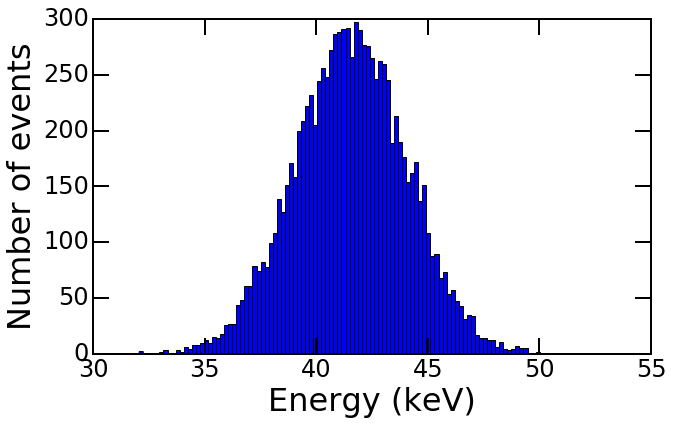

In [342]:
# Make some normal distribution toy data with errors (=1 if data 0)
data=plt.hist(np.random.normal(loc=41.5, scale=2.5, size=10000),100)
ydata = data[0]
xdata = data[1][:-1]
ydataerr = []
for y in ydata:
    yerr=np.sqrt(y)
    if yerr<=0:
        yerr=1.
    ydataerr.append(yerr)

plt.ylabel('Number of events')
plt.xlabel('Energy (keV)')
plt.show()    

Now that we have our data and our model we can make the function that we want to minimize with iMinuit. The minimization parameters have to be left as free inputs. The function output must be a single float. Therefore we only use chisquare_1d()[0]. 

Why do I go to all these lengths with defining a general and a specific $\chi^2$ function? Well, this allows us to fit multiple datasets and functions at once. Imagine you made two measurements, one background and one background+data. Then you can minimize the $\chi^2$ on both datasets and their corresponding fit functions simultaneously. I'll add an example later - actually I already have. In section 2. Here is a similar one in ROOT and all its painful glory: https://root.cern.ch/root/html/tutorials/fit/combinedFit.C.html

Another benefit is that we can add penalty terms to our specific $\chi^2$ functions. If we know the peak position of our Gaussian we could add a term like $(\mu-\mu_\text{true})^2/\Delta\mu_\text{true}^2$ to our combined $\chi^2$ which would give additional weight to that parameter in fitting. I shall also add an example for this later.

In [343]:
# This has everything fixed except for the functionparams a,b,c which are amplitude, mean and standard deviation
fitfunction=gaus


def combined_chisquare(a,b,c):
    return chisquare_1d(fitfunction,[a,b,c],xdata,ydata,ydataerr)[0]

describe(combined_chisquare) # What does minuit see?

['a', 'b', 'c']

Now give the minimizer command, set parameter ranges, initial errors, step size and whatnot...

In [344]:
m=Minuit(combined_chisquare, 
         a=300., #initial value
         error_a=2., #initial error
         b=41.5,
         error_b=1.,
         #fix_b=True, #fixed parameter
         c=3.,
         error_c=3.,
         limit_c=(0.,5.), #parameter limits
         print_level=1)
print('The initial parameters are:')
m.print_param()
print('Now proceed with the fit.')
m.migrad()


The initial parameters are:


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:10: InitialParamWarning: errordef is not given. Default to 1.


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,a,300,2,0,0,,,
2,b,41.5,1,0,0,,,
3,c,3,3,0,0,0.0,5.0,


Now proceed with the fit.


FCN = 81.457555156992 
 TOTAL NCALL = 0 
 NCALLS = 70 
 
 
 EDM = 1.5105151240394e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,a,288.104,3.55022,0,0,,,
2,b,41.4461,0.0251113,0,0,,,
3,c,2.4905,0.0179235,0,0,0.0,5.0,


({'is_valid': True, 'has_covariance': True, 'nfcn': 70, 'has_made_posdef_covar': False, 'has_valid_parameters': True, 'has_reached_call_limit': False, 'is_above_max_edm': False, 'has_posdef_covar': True, 'edm': 1.5105151240394e-07, 'fval': 81.457555156992, 'hesse_failed': False, 'up': 1.0, 'has_accurate_covar': True},
 [{'upper_limit': 0.0, 'has_limits': False, 'number': 0, 'name': 'a', 'is_const': False, 'error': 3.550223508105874, 'lower_limit': 0.0, 'is_fixed': False, 'has_lower_limit': False, 'value': 288.1039021154719, 'has_upper_limit': False},
  {'upper_limit': 0.0, 'has_limits': False, 'number': 1, 'name': 'b', 'is_const': False, 'error': 0.02511131151371489, 'lower_limit': 0.0, 'is_fixed': False, 'has_lower_limit': False, 'value': 41.446069942232754, 'has_upper_limit': False},
  {'upper_limit': 5.0, 'has_limits': True, 'number': 2, 'name': 'c', 'is_const': False, 'error': 0.017923518522820814, 'lower_limit': 0.0, 'is_fixed': False, 'has_lower_limit': True, 'value': 2.490501601

Draw the data and the fit. In the brutish rootish style we love.

<function matplotlib.pyplot.show>

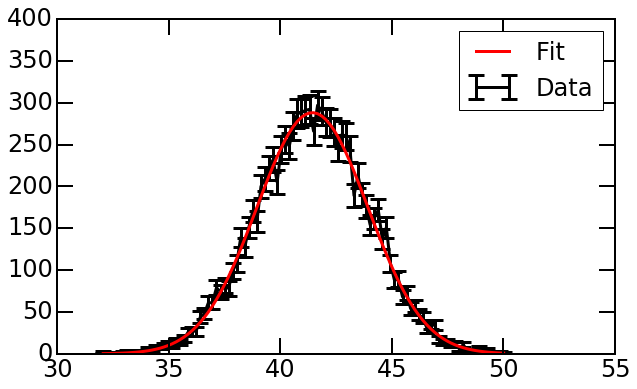

In [345]:
plt.errorbar(xdata,ydata,ydataerr,c='black', label='Data')
plt.plot(xdata,fitfunction(xdata,m.args),c='red', label='Fit') #m.args is the array of function values returned by Minuit
plt.ylim(0,400)
plt.legend(loc='best')
plt.show

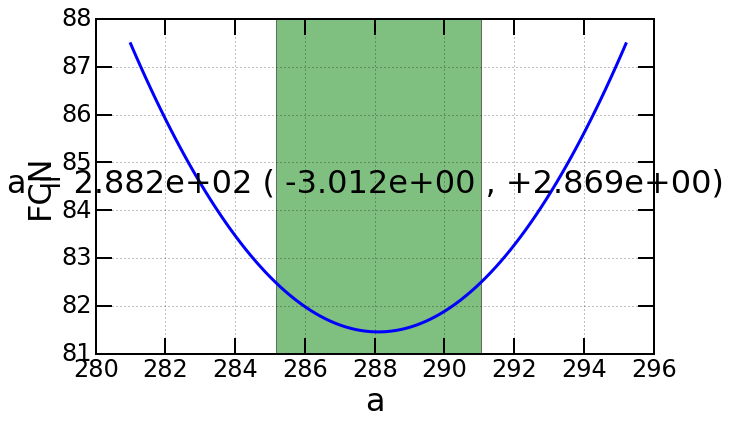

In [346]:
m.draw_profile('a')
plt.show()

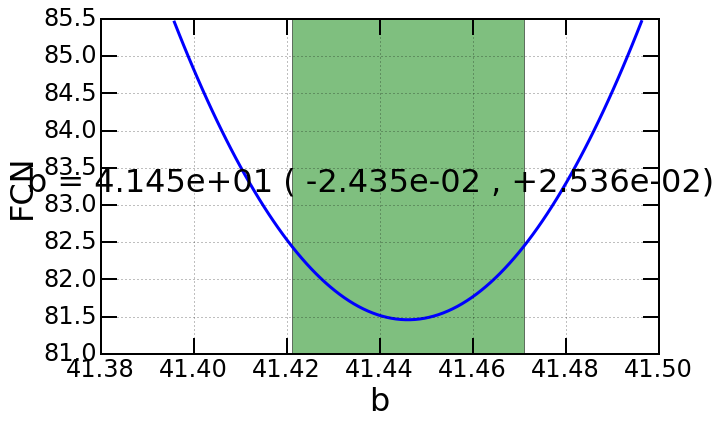

In [347]:
m.draw_profile('b')
plt.show()

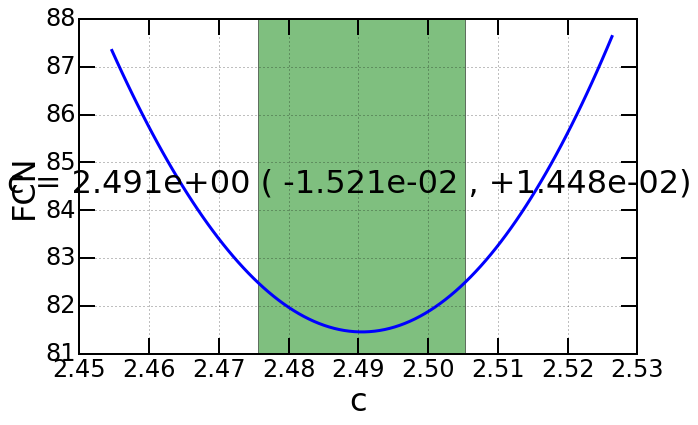

In [348]:
m.draw_profile('c')
plt.show()

<a list of 6 text.Text objects>

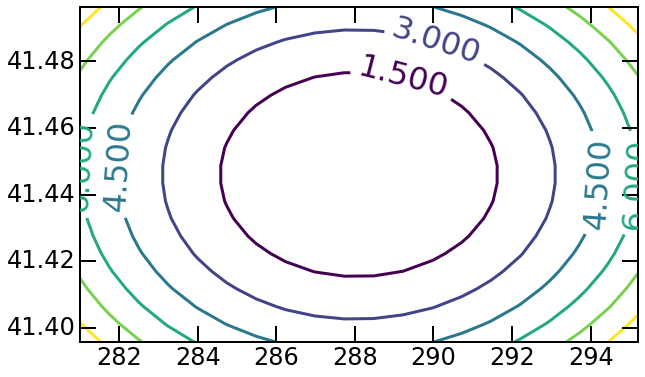

In [349]:
#2d parameter contour NOT minos contour
a,b,c = m.contour('a','b',subtract_min=True)
cs = contour(a,b,c)
clabel(cs)



In [350]:
m.minos()


m.print_param()
m.print_matrix()



Error,-3.543123985223646,3.5569142872619715
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.025120505252842932,0.025104472103626655
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.017961222204315955,0.017884994212113415
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,a,288.104,3.55022,-3.54312,3.55691,,,
2,b,41.4461,0.0251113,-0.0251205,0.0251045,,,
3,c,2.4905,0.0179235,-0.0179612,0.017885,0.0,5.0,


+,a,b,c
a,1.00,0.02,-0.58
b,0.02,1.00,-0.03
c,-0.58,-0.03,1.00


## 2. Constrained fit of two datasets

Now we try something new. We fit the Gaussian over an exponential background and take two datasets. One is the background only dataset and the other the background+Gaussian. 

Now make mock data again. This time an exponential distribution and an exponential distribution with background. Start with the background only data and then proceed with background + signal. As we want to add the signal and background histograms it is handier to do this directly in numpy instead of taking the detour over matplotlib histograms as above. 

<function matplotlib.pyplot.show>

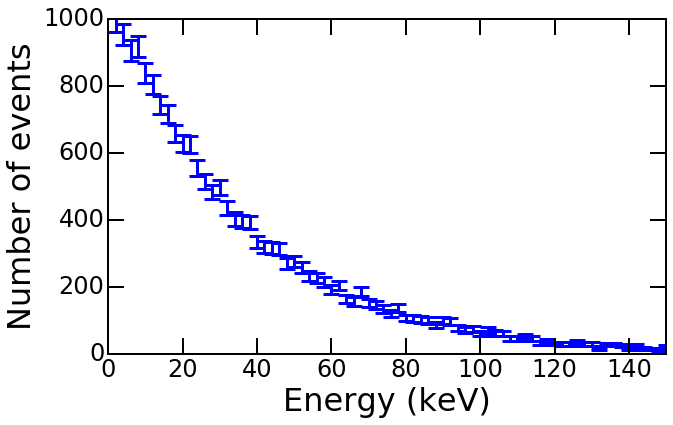

In [351]:
databg=np.histogram(6*np.random.exponential(scale=6, size=20000),bins=100,range=(0,200))
ydatabg = databg[0]
xdatabg = databg[1][:-1]
ydataerrbg = []
for y in ydatabg:
    yerr=np.sqrt(y)
    if yerr<=0:
        yerr=1.
    ydataerrbg.append(yerr)

plt.ylabel('Number of events')
plt.xlabel('Energy (keV)')
plt.errorbar(xdatabg,ydatabg,ydataerrbg,linestyle='')
plt.xlim(0,150)
plt.ylim(0,1000)
plt.show


(0, 1000)

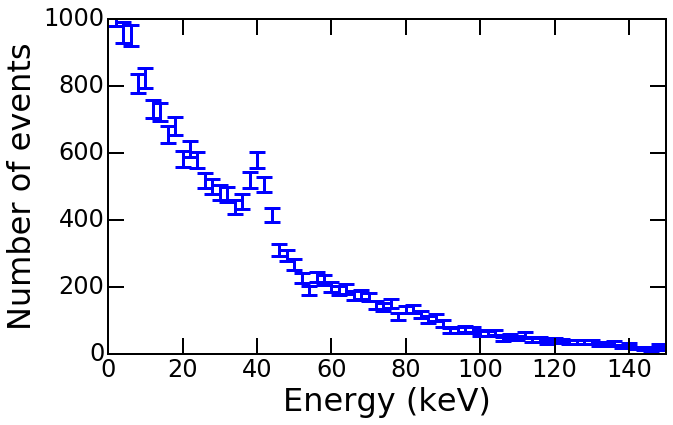

In [352]:
data=np.histogram(np.random.normal(loc=41.5, scale=2.5, size=700),bins=100,range=(0,200))
bg=np.histogram(6*np.random.exponential(scale=6, size=20000),bins=100,range=(0,200))
ydata = data[0]+bg[0]
xdata = data[1][:-1]
ydataerr = []
for y in ydata:
    yerr=np.sqrt(y)
    if yerr<=0:
        yerr=1.
    ydataerr.append(yerr)



plt.errorbar(xdata,ydata,ydataerr,linestyle='')
plt.ylabel('Number of events')
plt.xlabel('Energy (keV)')
plt.xlim(0,150)
plt.ylim(0,1000)

Now define a combined $\chi^2$ for both datasets and the fit functions for background only as well as background + signal. The fit functions are an exponential for background only and a sum of Gaussian and exponential for background + signal. The parameters $a$ and $b$ of the exponential are shared between both fit functions.

In [353]:
# This has everything fixed except for the functionparams a,b,c which are amplitude, mean and standard deviation
def expo(x,expoparams=[1,1]):
    return np.multiply(expoparams[0],np.exp(np.divide(-x,expoparams[1])))

def expo_plus_gaus(x,params=[1,1,1,1,1]):
    return np.add(np.multiply(params[0],np.exp(np.divide(-x,params[1]))),np.multiply(params[2],np.exp(-np.divide(np.power(np.subtract(x,params[3]),2),2*np.power(params[4],2)))))

#The sum of both individual chi2 is the combined chi2
def combined_chisquare(a,b,c,d,e):
    return chisquare_1d(expo,[a,b],xdata,ydata,ydataerr)[0]+chisquare_1d(expo_plus_gaus,[a,b,c,d,e],xdata,ydata,ydataerr)[0] 

describe(combined_chisquare) # What does minuit see?

['a', 'b', 'c', 'd', 'e']

In [354]:
m=Minuit(combined_chisquare, 
         a=1000.,
         b=8,
         c=300.,
         d=41.5,
         e=2.5,
         print_level=1)
print('The initial parameters are:')
m.print_param()
print('Now proceed with the fit.')
m.migrad()



The initial parameters are:


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:7: InitialParamWarning: errordef is not given. Default to 1.
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:7: InitialParamWarning: Parameter a is floating but does not have initial step size. Assume 1.
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:7: InitialParamWarning: Parameter b is floating but does not have initial step size. Assume 1.
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:7: InitialParamWarning: Parameter c is floating but does not have initial step size. Assume 1.
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:7: InitialParamWarning: Parameter d is floating but does not have initial step size. Assume 1.
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:7: InitialPar

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,a,1000,1,0,0,,,
2,b,8,1,0,0,,,
3,c,300,1,0,0,,,
4,d,41.5,1,0,0,,,
5,e,2.5,1,0,0,,,


Now proceed with the fit.


FCN = 470.0864789526248 
 TOTAL NCALL = 0 
 NCALLS = 235 
 
 
 EDM = 1.053227169491446e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,a,1096.1,7.71777,0,0,,,
2,b,35.6731,0.181679,0,0,,,
3,c,216.17,18.6795,0,0,,,
4,d,40.3304,0.244521,0,0,,,
5,e,-2.62781,0.240606,0,0,,,


({'is_valid': True, 'has_covariance': True, 'nfcn': 235, 'has_made_posdef_covar': False, 'has_valid_parameters': True, 'has_reached_call_limit': False, 'is_above_max_edm': False, 'has_posdef_covar': True, 'edm': 1.053227169491446e-05, 'fval': 470.0864789526248, 'hesse_failed': False, 'up': 1.0, 'has_accurate_covar': True},
 [{'upper_limit': 0.0, 'has_limits': False, 'number': 0, 'name': 'a', 'is_const': False, 'error': 7.717774746581678, 'lower_limit': 0.0, 'is_fixed': False, 'has_lower_limit': False, 'value': 1096.0968320572592, 'has_upper_limit': False},
  {'upper_limit': 0.0, 'has_limits': False, 'number': 1, 'name': 'b', 'is_const': False, 'error': 0.18167945317172, 'lower_limit': 0.0, 'is_fixed': False, 'has_lower_limit': False, 'value': 35.673075856120334, 'has_upper_limit': False},
  {'upper_limit': 0.0, 'has_limits': False, 'number': 2, 'name': 'c', 'is_const': False, 'error': 18.679522935500927, 'lower_limit': 0.0, 'is_fixed': False, 'has_lower_limit': False, 'value': 216.1697

<function matplotlib.pyplot.show>

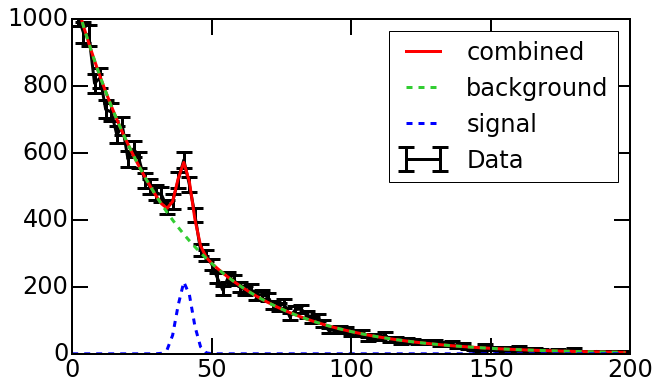

In [355]:
plt.errorbar(xdata,ydata,ydataerr,c='black', label='Data')
plt.plot(xdata,expo_plus_gaus(xdata,m.args),c='red', label='combined') #m.args is the array of function values
plt.plot(xdata,expo(xdatabg,[m.args[0],m.args[1]]),c='limegreen', label='background',linestyle='--') #m.args is the array of function values
plt.plot(xdata,gaus(xdata,[m.args[2],m.args[3],m.args[4]]),c='blue', label='signal',linestyle='--') #m.args is the array of function values

plt.ylim(0,1000)
plt.xlim(0,200)
plt.legend(loc='best')
plt.show

<function matplotlib.pyplot.show>

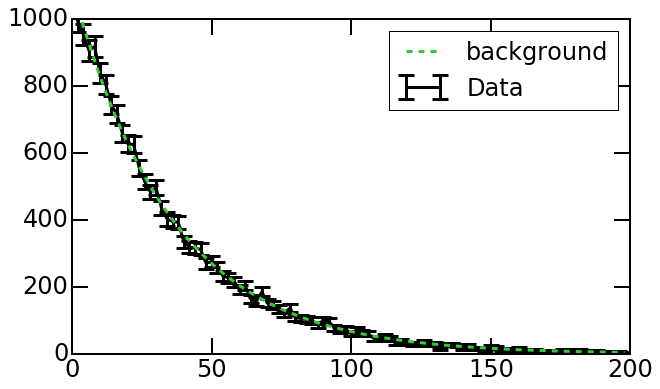

In [356]:
plt.errorbar(xdatabg,ydatabg,ydataerrbg,c='black', label='Data')
plt.plot(xdata,expo(xdatabg,[m.args[0],m.args[1]]),c='limegreen', label='background',linestyle='--') #m.args is the array of function values
plt.ylim(0,1000)
plt.xlim(0,200)
plt.legend(loc='best')
plt.show

## 3. Linear fits with different $\chi^2$ functor
Because all of the above is easy now we try something different by defining our $\chi^2$ functor in the recommended fashion. For this fit functions also have to be implemented in a slightly different way. I bet you are smart enough to figure this out yourself. I like my implementation better in the way I like the black death better than cholera.

In [357]:
from iminuit.util import make_func_code
class Chi2Functor:
    def __init__(self,f,x,y,yerr):
        self.f = f
        self.x = x
        self.y = y
        self.yerr = yerr
        f_sig = describe(f)
        #this is how you fake function 
        #signature dynamically
        self.func_code = make_func_code(f_sig[1:])#docking off independent variable
        self.func_defaults = None #this keeps np.vectorize happy
    def __call__(self,*arg):
        #notice that it accept variable length
        #positional arguments
        chi2 = sum(((y-self.f(x,*arg))**2)/(yerr**2) for x,y,yerr in zip(self.x,self.y,self.yerr))
        return chi2

def linear(x,a,b):
    return np.add(a,np.multiply(b,x))

def expo(x,a,b):
    return np.multiply(a,np.exp(np.divide(x,b)))

def ampgaus(x,a,b,c):
    return np.multiply(a,np.exp(-np.divide(np.power(np.subtract(x,b),2),2*np.power(c,2))))

def gaus_plus_expo(x,a,b,c,d,e):
    return np.add(np.multiply(a,np.exp(np.divide(x,b))),np.multiply(c,np.exp(-np.divide(np.power(np.subtract(x,d),2),2*np.power(e,2)))))

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:6: InitialParamWarning: errordef is not given. Default to 1.
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:6: InitialParamWarning: Parameter a does not have initial value. Assume 0.
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:6: InitialParamWarning: Parameter a is floating but does not have initial step size. Assume 1.
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:6: InitialParamWarning: Parameter b does not have initial value. Assume 0.
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:6: InitialParamWarning: Parameter b is floating but does not have initial step size. Assume 1.


FCN = 0.8235294117647065 
 TOTAL NCALL = 0 
 NCALLS = 32 
 
 
 EDM = 7.208875874885056e-24 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,a,1,1.27657,0,0,,,
2,b,1.88235,0.513436,0,0,,,


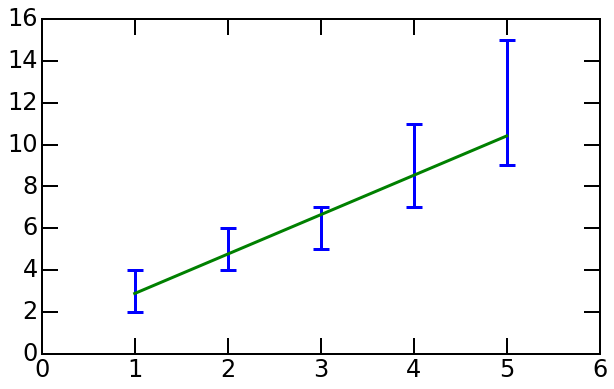

In [359]:
x = [1,2,3,4,5]
y = [3,5,6,9,12]# y=2x+1 with some random "fluctuation" (in the PandaX sense...)
yerr = [1,1,1,2,3]

linear_chi2=Chi2Functor(linear,x,y,yerr)
m = Minuit(linear_chi2)
m.migrad()

a=m.args[0]
b=m.args[1]

plt.errorbar(x,y,yerr,linestyle='')
plt.plot(x,linear(x,a,b))
plt.xlim(0,6)
plt.ylim(0,16)
plt.show()